In [1]:
#import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
#import the preprocess library of image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#loading image data
x_train=train_datagen.flow_from_directory(r'D:\dataset\train_set',target_size=(64,64),batch_size=5,class_mode="categorical",color_mode='rgb')
x_test=test_datagen.flow_from_directory(r'D:\dataset\test_set',target_size=(64,64),batch_size=5,class_mode="categorical",color_mode='rgb')

Found 671 images belonging to 4 classes.
Found 136 images belonging to 4 classes.


In [5]:
#initialize the model
model=Sequential()

In [6]:
#adding layers
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
model.add(Flatten())

In [8]:
#hidden layer
model.add(Dense(units=300,kernel_initializer="random_uniform",activation='relu'))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation='relu'))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation='relu'))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation='relu'))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation='relu'))

In [9]:
#output layer
model.add(Dense(units=4,kernel_initializer="random_uniform",activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [11]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
#train the model
model.fit_generator(x_train,steps_per_epoch=134,epochs=50,validation_data=x_test,validation_steps=27)

C:\Users\jijis\AppData\Local\Temp\ipykernel_2388\68272945.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=134,epochs=50,validation_data=x_test,validation_steps=27)


Epoch 1/50
134/134 [==============================] - 60s 412ms/step - loss: 1.3892 - accuracy: 0.2237 - val_loss: 1.3863 - val_accuracy: 0.2519
Epoch 2/50
134/134 [==============================] - 32s 239ms/step - loss: 1.3939 - accuracy: 0.2943 - val_loss: 1.3389 - val_accuracy: 0.2815
Epoch 3/50
134/134 [==============================] - 32s 237ms/step - loss: 1.2883 - accuracy: 0.3694 - val_loss: 1.4487 - val_accuracy: 0.3630
Epoch 4/50
134/134 [==============================] - 31s 230ms/step - loss: 1.2042 - accuracy: 0.3979 - val_loss: 1.3264 - val_accuracy: 0.3778
Epoch 5/50
134/134 [==============================] - 32s 238ms/step - loss: 1.2897 - accuracy: 0.4114 - val_loss: 1.2750 - val_accuracy: 0.4593
Epoch 6/50
134/134 [==============================] - 30s 228ms/step - loss: 1.1877 - accuracy: 0.4474 - val_loss: 1.4929 - val_accuracy: 0.3852
Epoch 7/50
134/134 [==============================] - 32s 239ms/step - loss: 1.2008 - accuracy: 0.4505 - val_loss: 1.3053 - val_ac

In [79]:
#save the model
model.save("disaster.h5")

In [86]:
#test the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [81]:
model=load_model("disaster.h5")
img=image.load_img("Wildfire.jpg",target_size=(64,64))

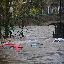

In [82]:
img

In [83]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred_prob=model.predict(x)

1/1 [==============================] - 0s 156ms/step


In [84]:
class_name=["Cyclone","Earthquake","Flood","Wildfire"]
pred_id=pred_prob.argmax(axis=1)[0]
pred_id

0

In [85]:
print(str(class_name[pred_id]))

Cyclone
